In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/petrol_consumption.csv')

In [3]:
df

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.00,3571,1976,0.525,541
1,9.00,4092,1250,0.572,524
2,9.00,3865,1586,0.580,561
3,7.50,4870,2351,0.529,414
4,8.00,4399,431,0.544,410
5,10.00,5342,1333,0.571,457
6,8.00,5319,11868,0.451,344
7,8.00,5126,2138,0.553,467
8,8.00,4447,8577,0.529,464
9,7.00,4512,8507,0.552,498


In [33]:
x=df.drop('Petrol_Consumption', axis=1)
y=df['Petrol_Consumption']

In [34]:
# cross Validate the data

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,random_state=0)
x_test

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
29,9.0,3601,4650,0.493
4,8.0,4399,431,0.544
26,8.0,3448,5399,0.548
30,7.0,3640,6905,0.518
32,8.0,3063,6524,0.578
37,7.0,3897,6385,0.586
34,8.0,3528,3495,0.487
40,7.0,4449,4639,0.626
7,8.0,5126,2138,0.553
10,8.0,4391,5939,0.530


In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
reg_rf=RandomForestRegressor(random_state=0,n_estimators=10)

In [39]:
# trained the model

In [41]:
reg_rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [42]:
# Evaluate the performance

In [43]:
y_pred=reg_rf.predict(x_test)

In [44]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [45]:
mean_absolute_error(y_test,y_pred),mean_absolute_percentage_error(y_test,y_pred)

(68.02499999999999, 0.1285057916795862)

In [46]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
result

,Actual,Predicted
29,534,595.0
4,410,506.1
26,577,647.4
30,571,647.4
32,577,653.8
37,704,629.0
34,487,633.4
40,587,541.3
7,467,468.6
10,580,601.4


In [52]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

76.75312697213057

In [48]:
reg_rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=209652396),
 DecisionTreeRegressor(max_features=1.0, random_state=398764591),
 DecisionTreeRegressor(max_features=1.0, random_state=924231285),
 DecisionTreeRegressor(max_features=1.0, random_state=1478610112),
 DecisionTreeRegressor(max_features=1.0, random_state=441365315),
 DecisionTreeRegressor(max_features=1.0, random_state=1537364731),
 DecisionTreeRegressor(max_features=1.0, random_state=192771779),
 DecisionTreeRegressor(max_features=1.0, random_state=1491434855),
 DecisionTreeRegressor(max_features=1.0, random_state=1819583497),
 DecisionTreeRegressor(max_features=1.0, random_state=530702035)]

[Text(0.5555555555555556, 0.95, 'Population_Driver_licence(%) <= 0.7\nsquared_error = 11864.53\nsamples = 22\nvalue = 579.17'),
 Text(0.5185185185185185, 0.85, 'Average_income <= 4408.5\nsquared_error = 4840.57\nsamples = 21\nvalue = 553.18'),
 Text(0.2037037037037037, 0.75, 'Population_Driver_licence(%) <= 0.55\nsquared_error = 2290.52\nsamples = 13\nvalue = 587.38'),
 Text(0.1111111111111111, 0.65, 'Paved_Highways <= 5663.0\nsquared_error = 1331.51\nsamples = 3\nvalue = 557.78'),
 Text(0.07407407407407407, 0.55, 'Petrol_tax <= 8.0\nsquared_error = 138.89\nsamples = 2\nvalue = 582.67'),
 Text(0.037037037037037035, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 591.0'),
 Text(0.1111111111111111, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 566.0'),
 Text(0.14814814814814814, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 508.0'),
 Text(0.2962962962962963, 0.65, 'Paved_Highways <= 2785.5\nsquared_error = 1859.58\nsamples = 10\nvalue = 609.58'),
 Text(0.2222222222222222, 0.55, 'P

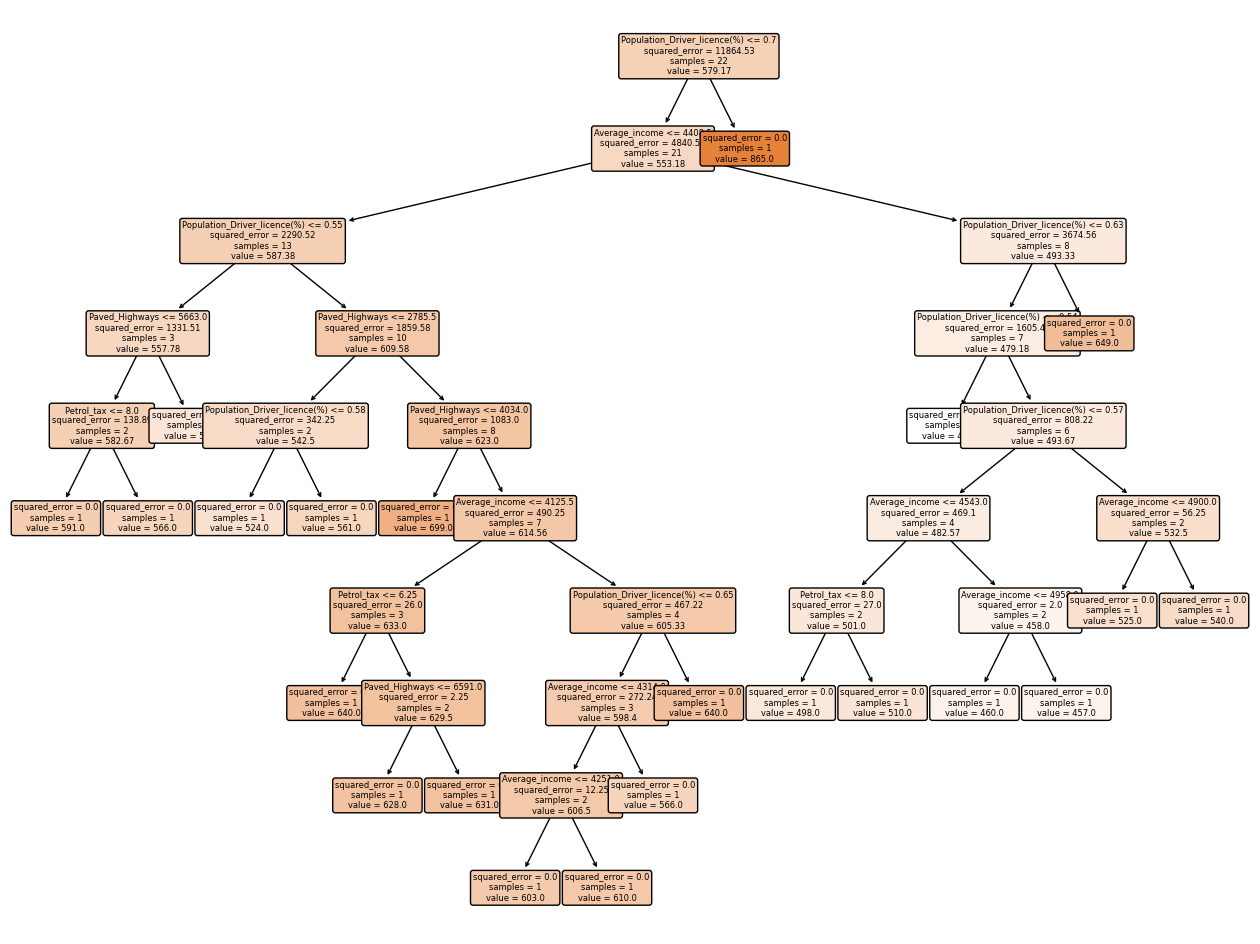

In [49]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,12))
plot_tree(reg_rf.estimators_[2],fontsize=6,feature_names=x.columns,filled=True, precision=2, rounded=True)